In [1]:
import numpy as np
import pandas as pd
# import neurokit2 as nk
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from datasim.ecg.ecg_simulate import *
from datasim.scg.scg_simulate import *
import pywt
from utils import *
import math

In [8]:
# def send_vital_result(group, mac,timestamp, hr, rr, bph, bpl, movement, occupancy, occ_timestamp, alert, alert_timestamp):
#     topic="/" + group + "/" + mac + "/vital"
 
#     payload ="timestamp=" + str(timestamp)

#     if hr != -1:
#         payload += "; heartrate=" + str(hr) 
#     if rr != -1:
#         payload += "; respiratoryrate=" + str(rr) 
#     if bph != -1:
#         payload += "; systolic=" + str(bph) 
#     if bpl != -1:
#         payload += "; diastolic=" + str(bpl) 
    
#     if movement != -1:
#         payload += "; movement=" + str(movement)
    
#     for index, oc in enumerate(occupancy):
#         payload += "; timestamp=" + str(occ_timestamp + index*10**9) # assuming timestamp in nano seconds
#         payload += "; occupancy=" + str(occupancy[index])
    
#     if alert != -1:
#         payload += "; timestamp=" + str(alert_timestamp) + "; alert=" + str(alert)

#     if not DRY_RUN_MODE:
#         mqtt_dedicated_pubish.publish(topic, payload, qos=1)
#         if debug:
#             global mqtt_publishing_cnt
#             mqtt_publishing_cnt +=1
#             if mqtt_publishing_cnt % 100 ==0:
#                 print(f"mqtt_publishing_cnt={mqtt_publishing_cnt}")
#     else:
#         # print(topic)
#         pass
#     return

In [2]:
# ## For Original Signal

# influx = {'ip':'http://sensorserver.engr.uga.edu', 'db':'shake',
#                   'user':'algtest', 'passw':'sensorweb711', 
#                   'ssl':False}

# table_name = 'Z'
# data_name = 'value'
# unit = '12:02:12:02:12:02'

In [13]:
# For Labels
influx = {'ip':'https://sensorserver.engr.uga.edu', 'db':'healthresult',
                  'user':'algtest', 'passw':'sensorweb711', 
                  'ssl':True}

table_name = 'vitals'
data_name = 'hrlabel'
unit = '74:4d:bd:8d:61:88'

In [39]:
data = np.load("wave_sine_rr_40_step_0.15_time_1739301718.npy")

In [40]:
data.shape

(6, 49203)

In [41]:
vitals = data[:,-2].reshape(-1,1)
vitals = np.repeat(vitals, repeats=120, axis=1)
vitals

array([[ 42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,
         42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  42.],
       [ 54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,
         54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,  54.,
         54.,  54.,  54.,  54.,  54.,  54.,

In [13]:
# raw_data = data[:, :-3]

In [11]:
# plt.plot(raw_data[0,:4400])

In [8]:
# ## For Raw Data

# for i in range(data.shape[0]):
#     write_influx(influx= influx, unit=unit,table_name=table_name, data_name=data_name, data=raw_data[i,:], start_timestamp=data[i, -3], fs = 410)

In [42]:
## For Vitals
for i in range(vitals.shape[0]):
    write_influx(influx= influx, unit=unit,table_name=table_name, data_name=data_name, data=vitals[i,:], start_timestamp=data[i, -3], fs = 1)

Done
Done
Done
Done
Done
Done


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time   

otal    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1341    0     0  100  1341      0  89741 --:--:-- --:--:-- --:--:-- 95785
-4-11: 0 0-  -   60 7 40 01 8   k  0 0   391k --:--:-- --:-
0     1 0 00   1 010 3 4617 0 1        0   0    1 40757kk  ----:-:--:--:- ---- :----::--- --:--:-- --:--:-- - :5-0-3k 
 109k
100  6701    0     0  100  6701      0   578k --:--:-- --:--:-- --:--:--  594k
-:1-0-0: - -6 7 0113 0 k   1341 

## Code Testing

In [1]:
def sine_gen_with_rr_v3(amp, samples, duration, hr, rr):
    f_rr = rr/60
    f_hr = hr/60
    sampling_rate = samples
    phase = np.pi/2

    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    sine_wave = np.sin(2 * np.pi * f_hr * t - phase)

    breathing_effect = (np.sin(2 * np.pi * f_rr * t) + 1) / 2

    wave = sine_wave #* breathing_effect
    wave = amp + amp*wave
    return wave

In [3]:
def generate_increasing_amplitude_wave_array(i,step_size):
    # Create an array starting from 1.1, increasing by 0.1 up to length i
    step = step_size
    wave_array = np.arange(1, 1 + step * i, step)
    return wave_array

In [14]:
def sine_gen_with_rr_v4(amp, samples, duration, hr, rr, rr_step):
    wave = sine_gen_with_rr_v3(amp, samples, 1, 60, rr)
    max_amp = 4094

    val = int(np.round(hr/rr))
    reps = int(np.round(rr/60*duration))

    scaling_factors = generate_increasing_amplitude_wave_array(val, rr_step)
    # if len(scaling_factors) > 1:
    #     scaling_factors = scaling_factors[:-1]

    rsa = np.tile(wave, len(scaling_factors)) * np.repeat(scaling_factors, len(wave))
    rsa_norm = ((rsa-np.min(rsa))/(np.max(rsa)-np.min(rsa)) * max_amp)

    wave_f = np.tile(rsa_norm,reps)

    wave = signal.resample(wave_f,duration*samples)
    wave = abs(wave)
    return wave

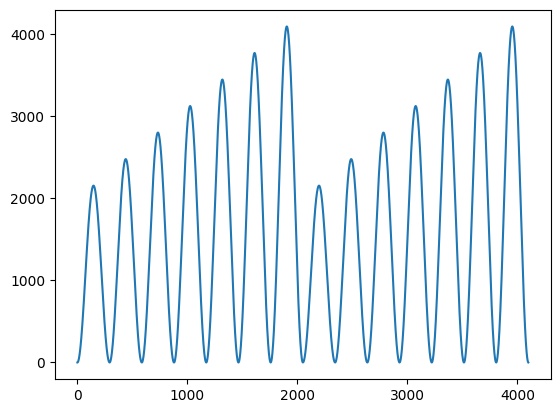

In [15]:
a = sine_gen_with_rr_v4(2047, 410, 10, 84, 12, 0.15)
plt.plot(a[:4100])

In [98]:
def sine_gen_with_rr_v5(amp, samples, duration, hr, rr, rr_step):
    wave = sine_gen_with_rr_v3(amp, samples, 1, 60, rr)
    max_amp = 4094
    hr_reps = int(np.round(hr/6))

    val = int(np.round(hr/rr))
    reps = int(np.round(rr/duration*60))

    wave = np.tile(wave, hr_reps)

    scaling_factors = generate_increasing_amplitude_wave_array(val, rr_step)
    if len(scaling_factors) > 1:
        scaling_factors = scaling_factors[:-1]

    # scaling_factors = generate_wave_array(val)

    rsa = np.tile(wave, len(scaling_factors)) * np.repeat(scaling_factors, len(wave))
    print(rsa.shape)
    rsa_norm = ((rsa-np.min(rsa))/(np.max(rsa)-np.min(rsa)) * max_amp)

    wave_f = np.tile(rsa_norm,reps)

    wave = signal.resample(wave_f,duration*samples)
    wave = abs(wave)
    return wave, rsa

## Data Vis

In [9]:
a = np.load('wave_sine_rr_12_step_0.15_time_1739389059.npy')

In [10]:
a.shape

(4, 4103)

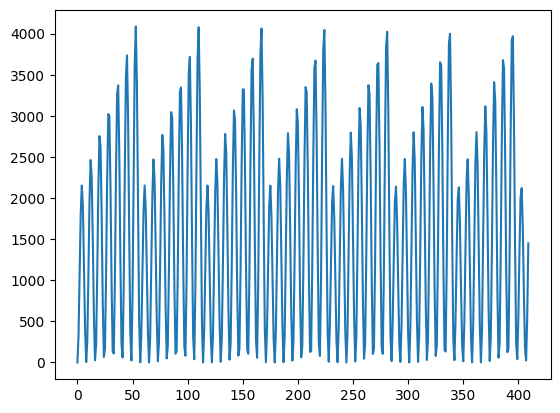

In [12]:
plt.plot(a[0,:410])